In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,f1_score, precision_score,recall_score

(array([19.,  0.,  1.]),
 array([ 2.,  9., 16., 23.]),
 <a list of 3 Patch objects>)

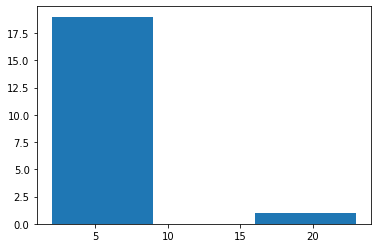

In [2]:
a=[2,3,2,3,4,2,3,4,23,5,6,7,4,3,5,6,7,8,2,4]

plt.hist(a,bins =3)

In [402]:
# reading the train dataframe
df=pd.read_csv('train_wn75k28.csv')
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [403]:
print(df.shape)

df.id.nunique()

(39161, 19)


39161

In [404]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

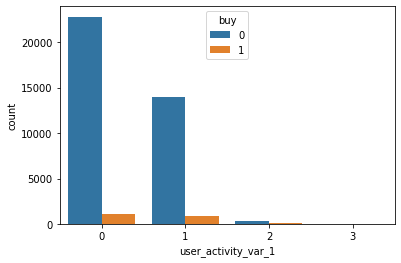

In [405]:
sns.countplot(data=df,x='user_activity_var_1',hue='buy')

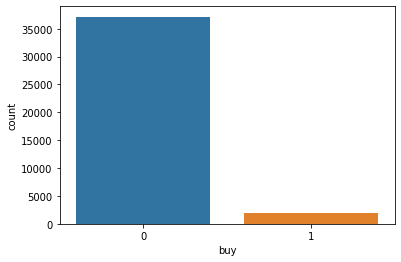

In [406]:
sns.countplot(data=df,x='buy')

In [407]:
print(f"% of samples with y=1: {df[df['buy']==1].shape[0]/df.shape[0]}")
      
print(f"% of samples with y=0: {df[df['buy']==0].shape[0]/df.shape[0]}")

% of samples with y=1: 0.05102014759582237
% of samples with y=0: 0.9489798524041776


## Data is imbalance

In [408]:
# EDA and data checks

In [409]:
df.products_purchased.value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [410]:
df[df.buy==1]['products_purchased'].value_counts()

2.0    383
3.0    254
1.0    242
4.0     74
Name: products_purchased, dtype: int64

In [411]:
df[df.buy==0]['products_purchased'].value_counts()

2.0    8484
3.0    4770
1.0    3401
4.0     642
Name: products_purchased, dtype: int64

In [412]:
df[df.buy==0]['products_purchased'].isnull().sum(), df[df.buy==1]['products_purchased'].isnull().sum()

(19866, 1045)

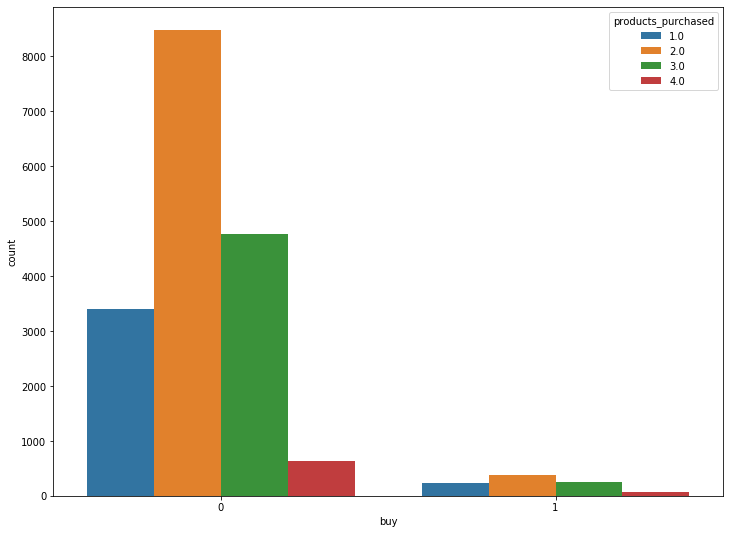

In [413]:
plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='buy',hue='products_purchased')

In [414]:
# There is no clear distinction to what should be the number of products_purchased to for a lead to buy product in the next 3 months
# the product_purchased column doesn't much impact on the identification of potential lead

#Therefore filling the null values with 0
df['products_purchased']=df.products_purchased.fillna(0.0)

In [415]:
# analysing signup_date column
df[df.buy==0]['signup_date'].isnull().sum(), df[df.buy==1]['signup_date'].isnull().sum()

(15088, 25)

In [416]:
df['signup_date'].values

array(['2020-09-24', '2020-09-19', '2021-08-11', ..., nan, nan,
       '2019-08-11'], dtype=object)

In [417]:
#creating a new column 'has_signup' which is 1 if signup_date is not null and 0 if signup date is null
df['has_signup']=1
df.loc[df['signup_date'].isnull(),'has_signup']=0

In [418]:
df['has_signup'].value_counts()

1    24048
0    15113
Name: has_signup, dtype: int64

In [419]:
# converting date columns into datetime
df['created_at']=pd.to_datetime(df['created_at'])

df['signup_date'] = pd.to_datetime(df['signup_date'])

In [420]:
df.campaign_var_1.value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

In [421]:
df.campaign_var_1.describe()

count    39161.000000
mean         6.523812
std          3.472944
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         16.000000
Name: campaign_var_1, dtype: float64

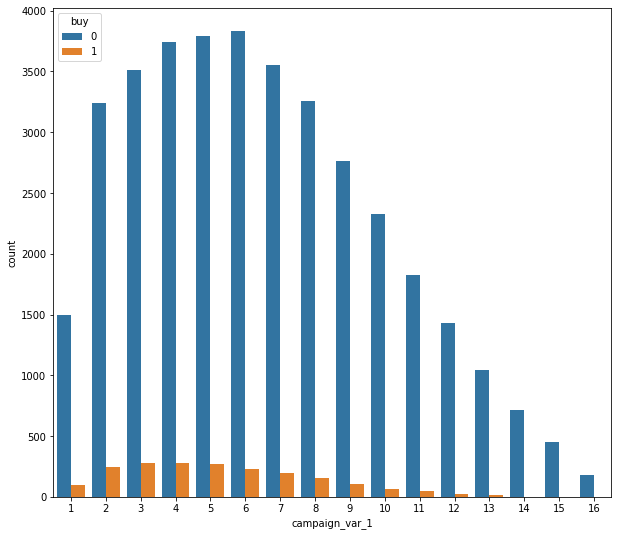

In [422]:
plt.subplots(figsize=(10,9))
sns.countplot(data=df,x='campaign_var_1',hue='buy')

In [423]:
# checking if the range
df[df['campaign_var_1']==7]['created_at'].min(),df[df['campaign_var_1']==7]['created_at'].max()

df[df['campaign_var_1']==3]['created_at'].min(),df[df['campaign_var_1']==3]['created_at'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [424]:
for i in range(16):
    a=df[(df['campaign_var_1']==i+1) & (df['buy']==1)].shape[0]/df[df['campaign_var_1']==i+1].shape[0]
    print(f"{i+1}: {a}")


1: 0.06089139987445072
2: 0.07142857142857142
3: 0.07293868921775898
4: 0.06893977103036336
5: 0.06576354679802955
6: 0.05614380694410244
7: 0.05298189563365282
8: 0.04461402993836219
9: 0.03593859036985345
10: 0.025501672240802676
11: 0.02562733582487987
12: 0.016494845360824743
13: 0.0113314447592068
14: 0.0028011204481792717
15: 0.006578947368421052
16: 0.0


In [425]:
# based on the above percentage(of y=1 in each ccategory of campaign_var_1) we can club some of the categories as the distribution of these categries is quite similar

# clubing category 2&3
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 2 if (x==2) | (x==3) else x)

#clubing category 4 & 5
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 3 if (x==4) | (x==5) else x)

#clubing category 6& 7
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 4 if (x==6) | (x==7) else x)

#renaming category 8
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 5 if (x==8) else x)

#renaming category 9
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 6 if (x==9) else x)

#clubing category 10 & 11
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 7 if (x==10) | (x==11) else x)

#clubing category 12 & 13
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 8 if (x==12) | (x==13) else x)

#clubing category 14 & 15
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 9 if (x==14) | (x==15) else x)

#renaming category 16
df['campaign_var_1']= df['campaign_var_1'].apply(lambda x : 10 if (x==16) else x)


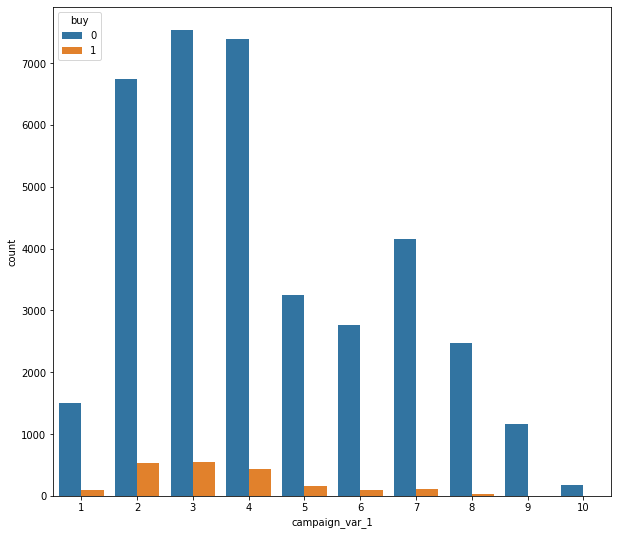

In [426]:
plt.subplots(figsize=(10,9))
sns.countplot(data=df,x='campaign_var_1',hue='buy')

In [427]:
df.campaign_var_2.value_counts()

6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64

In [428]:
df.campaign_var_2.describe()

count    39161.000000
mean         6.452746
std          2.614296
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         15.000000
Name: campaign_var_2, dtype: float64

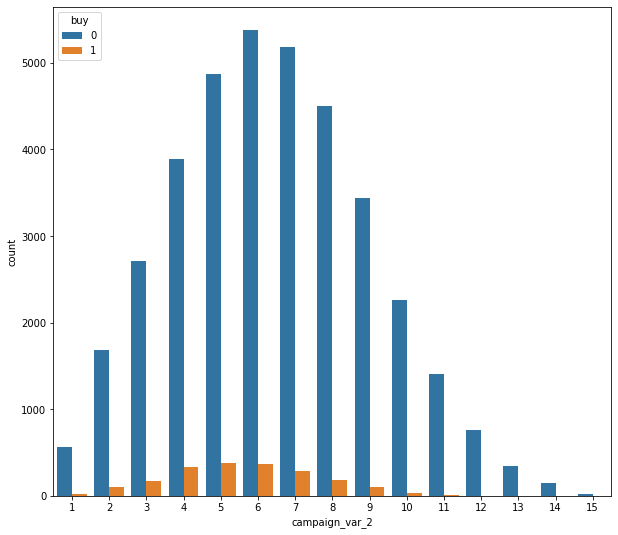

In [429]:
plt.subplots(figsize=(10,9))
sns.countplot(data=df,x='campaign_var_2',hue='buy')

In [430]:
for i in range(15):
    a=df[(df['campaign_var_2']==i+1) & (df['buy']==1)].shape[0]/df[df['campaign_var_2']==i+1].shape[0]
    print(f"{i+1}: {a}")

1: 0.03735144312393888
2: 0.058165548098434
3: 0.05896635449184877
4: 0.07785426062188465
5: 0.07238095238095238
6: 0.06354456824512535
7: 0.0535453216374269
8: 0.04029850746268657
9: 0.02883799830364716
10: 0.014795474325500435
11: 0.004964539007092199
12: 0.003942181340341655
13: 0.002849002849002849
14: 0.0
15: 0.0


In [431]:
# based on the above percentage(of y=1 in each ccategory of campaign_var_2) we can club some of the categories as the distribution of these categries is quite similar

# clubing category 2&3
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 2 if (x==2) | (x==3) else x)

#clubing category 4 & 5
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 3 if (x==4) | (x==5) else x)

#renaming category 6
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 4 if (x==6) else x)

#renaming category 7
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 5 if (x==7) else x)

#renaming category 8
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 6 if (x==8) else x)

#renaming category 9
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 7 if (x==9) else x)

#renaming category 10
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 8 if (x==10) else x)

#clubing category 11 & 12 & 13
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 9 if (x==11) | (x==12) | (x==13) else x)

#clubing category 14 & 15
df['campaign_var_2']= df['campaign_var_2'].apply(lambda x : 10 if (x==14) | (x==15) else x)


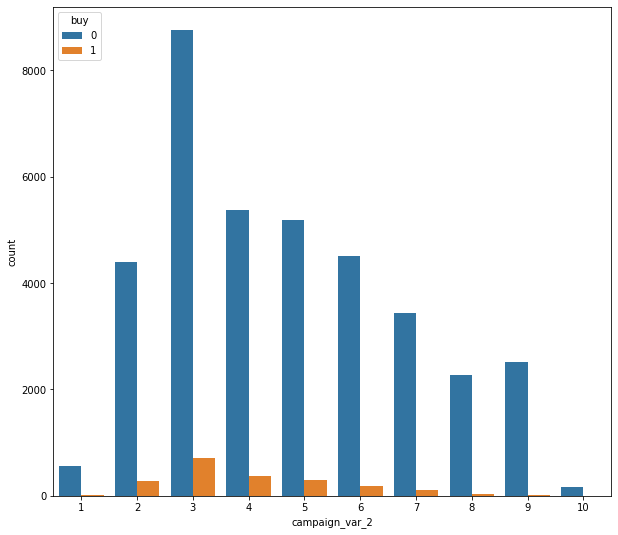

In [432]:
plt.subplots(figsize=(10,9))
sns.countplot(data=df,x='campaign_var_2',hue='buy')

In [433]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.campaign_var_1, df.campaign_var_2)
corr

0.5460667755173767

In [434]:
# creating a date_diff column which indicates the time period between sign up and the lead drop
df['date_diff']=df['created_at']-df['signup_date']

In [435]:
df[df['date_diff']==df['date_diff'].min()]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,has_signup,date_diff
110,111,2021-01-04,2,2,2.0,2022-03-25,0,0,0,0,...,0,1,0,0,0,0,0,0,1,-445 days


In [436]:
df['date_diff']=df['date_diff'].astype(str)
df['date_diff']=df['date_diff'].apply(lambda x: x.split(" ")[0])

In [437]:
df[df['date_diff']=='NaT']

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,has_signup,date_diff
11,12,2021-01-01,4,3,0.0,NaT,1,0,0,0,...,1,0,1,0,0,0,0,0,0,NaT
21,22,2021-01-02,6,5,0.0,NaT,1,0,0,0,...,0,1,0,0,0,0,0,0,0,NaT
22,23,2021-01-02,3,4,0.0,NaT,1,0,0,0,...,1,0,0,0,0,0,0,0,0,NaT
29,30,2021-01-02,5,3,0.0,NaT,1,0,0,0,...,1,0,1,0,0,0,0,0,0,NaT
35,36,2021-01-02,4,1,0.0,NaT,1,0,0,0,...,0,0,1,0,0,0,0,0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,39154,2021-12-31,9,10,0.0,NaT,0,0,0,0,...,1,0,0,0,0,1,0,0,0,NaT
39155,39156,2021-12-31,3,2,0.0,NaT,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaT
39157,39158,2021-12-31,2,7,3.0,NaT,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaT
39158,39159,2021-12-31,5,5,2.0,NaT,1,0,0,0,...,0,1,0,0,0,0,0,0,0,NaT


In [438]:
df['date_diff'].replace({'NaT': '-1000'},inplace=True)

In [439]:
df['date_diff']=df['date_diff'].astype(int)

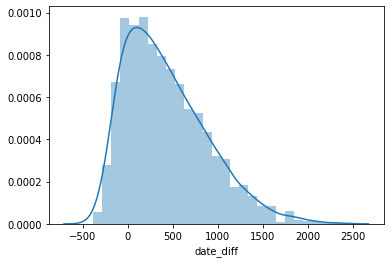

In [440]:
sns.distplot(df[(df['buy']==1) & (df['date_diff']!=-1000)]['date_diff'])

In [441]:
df[(df['buy']==1) & (df['date_diff']!=-1000)]['date_diff'].describe()

count    1973.000000
mean      428.695388
std       458.910571
min      -387.000000
25%        64.000000
50%       344.000000
75%       711.000000
max      2350.000000
Name: date_diff, dtype: float64

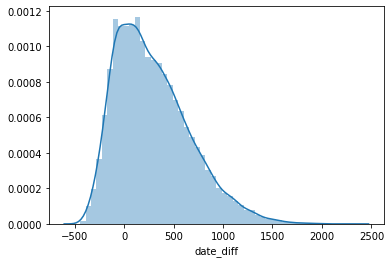

In [442]:
sns.distplot(df[(df['buy']==0) & (df['date_diff']!=-1000)]['date_diff'])

In [443]:
df[(df['buy']==0) & (df['date_diff']!=-1000)]['date_diff'].describe()

count    22075.000000
mean       290.547724
std        374.313873
min       -445.000000
25%          1.000000
50%        229.000000
75%        517.000000
max       2310.000000
Name: date_diff, dtype: float64

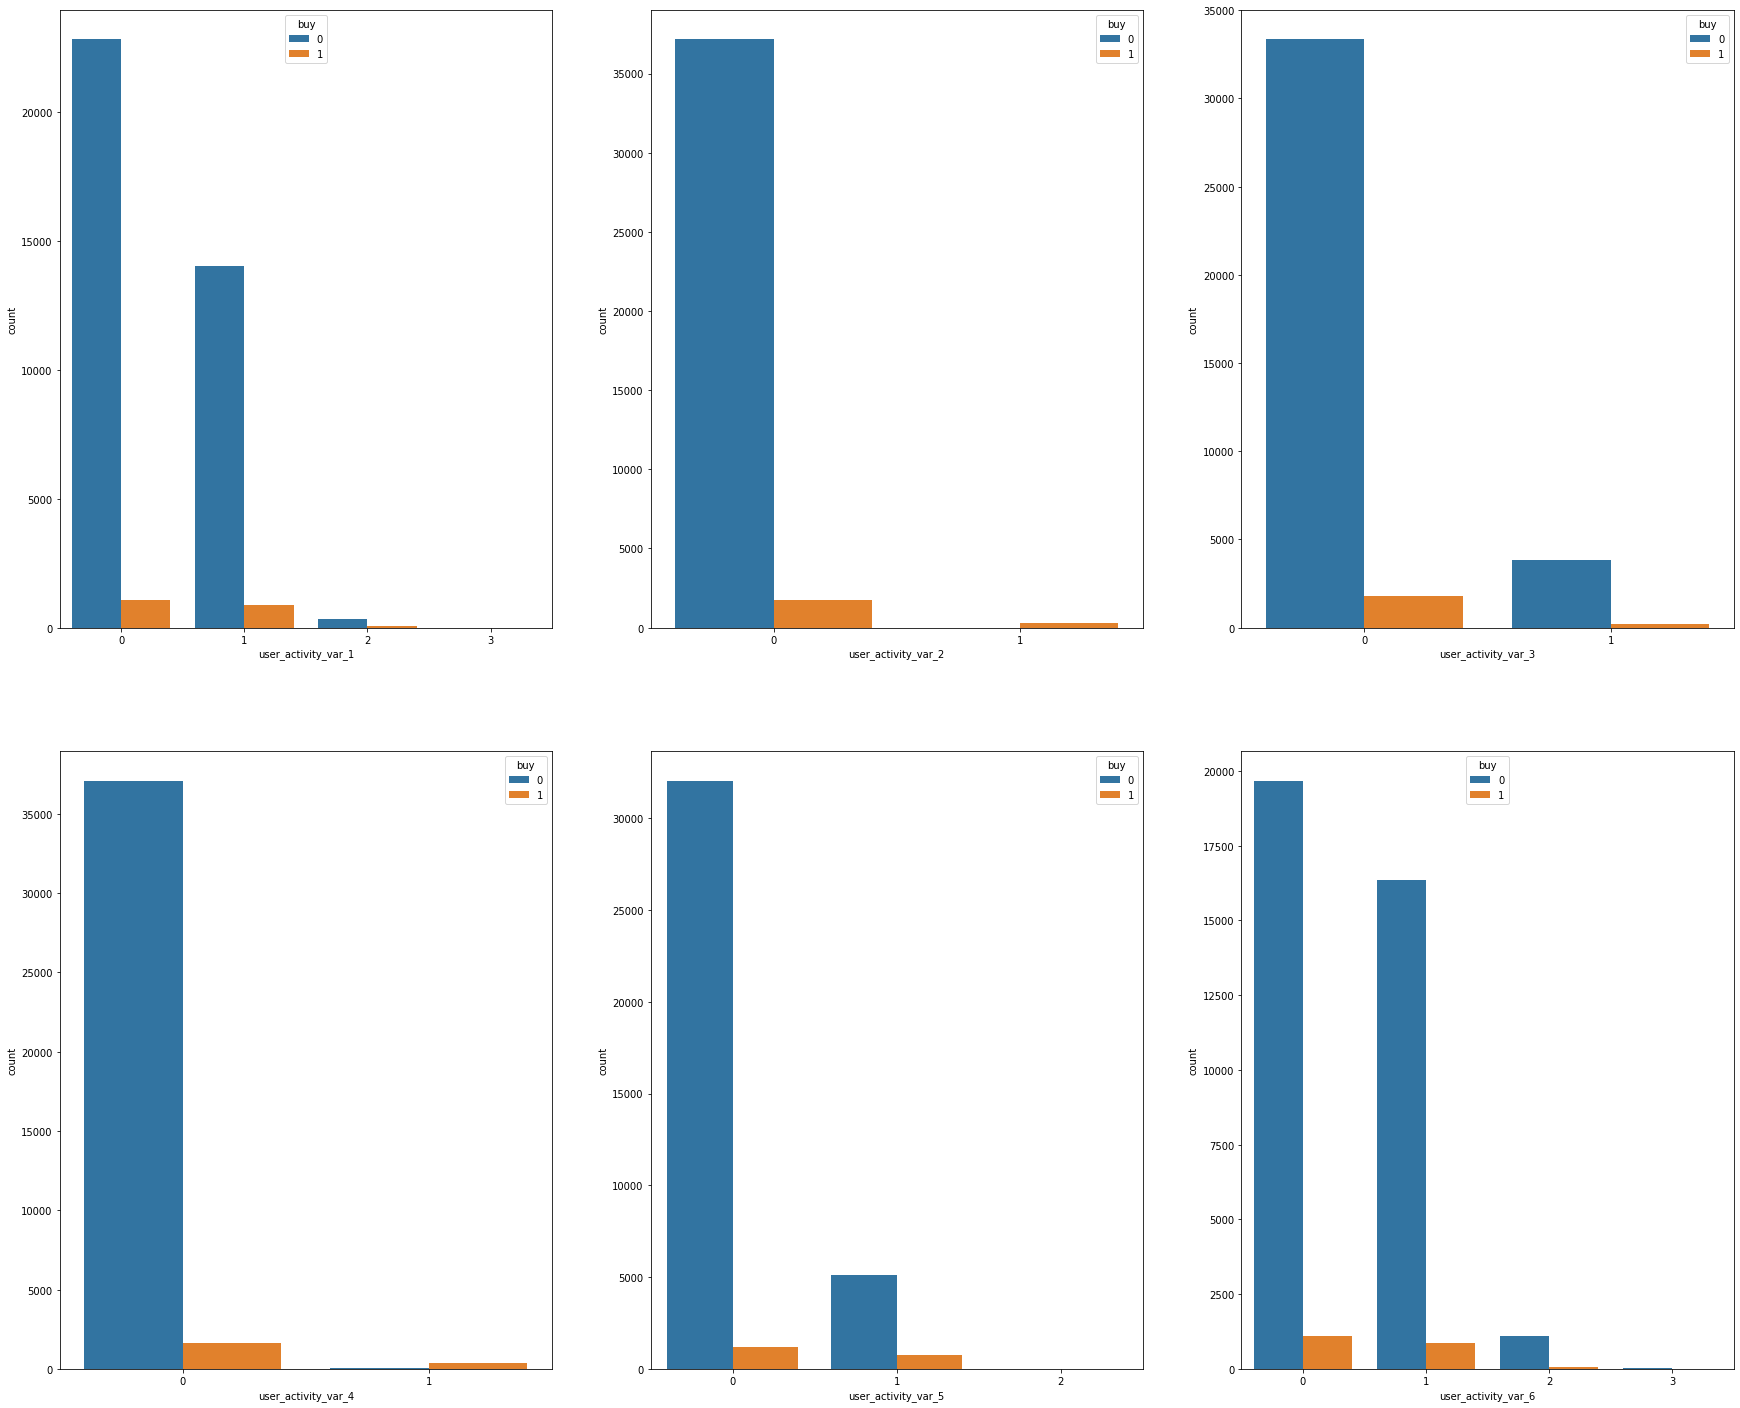

In [444]:
fig=plt.figure(figsize=(30,25))
plt.subplot(2,3,1)
sns.countplot(data=df,x='user_activity_var_1',hue='buy')
plt.subplot(2,3,2)
sns.countplot(data=df,x='user_activity_var_2',hue='buy')
plt.subplot(2,3,3)
sns.countplot(data=df,x='user_activity_var_3',hue='buy')
plt.subplot(2,3,4)
sns.countplot(data=df,x='user_activity_var_4',hue='buy')
plt.subplot(2,3,5)
sns.countplot(data=df,x='user_activity_var_5',hue='buy')
plt.subplot(2,3,6)
sns.countplot(data=df,x='user_activity_var_6',hue='buy')

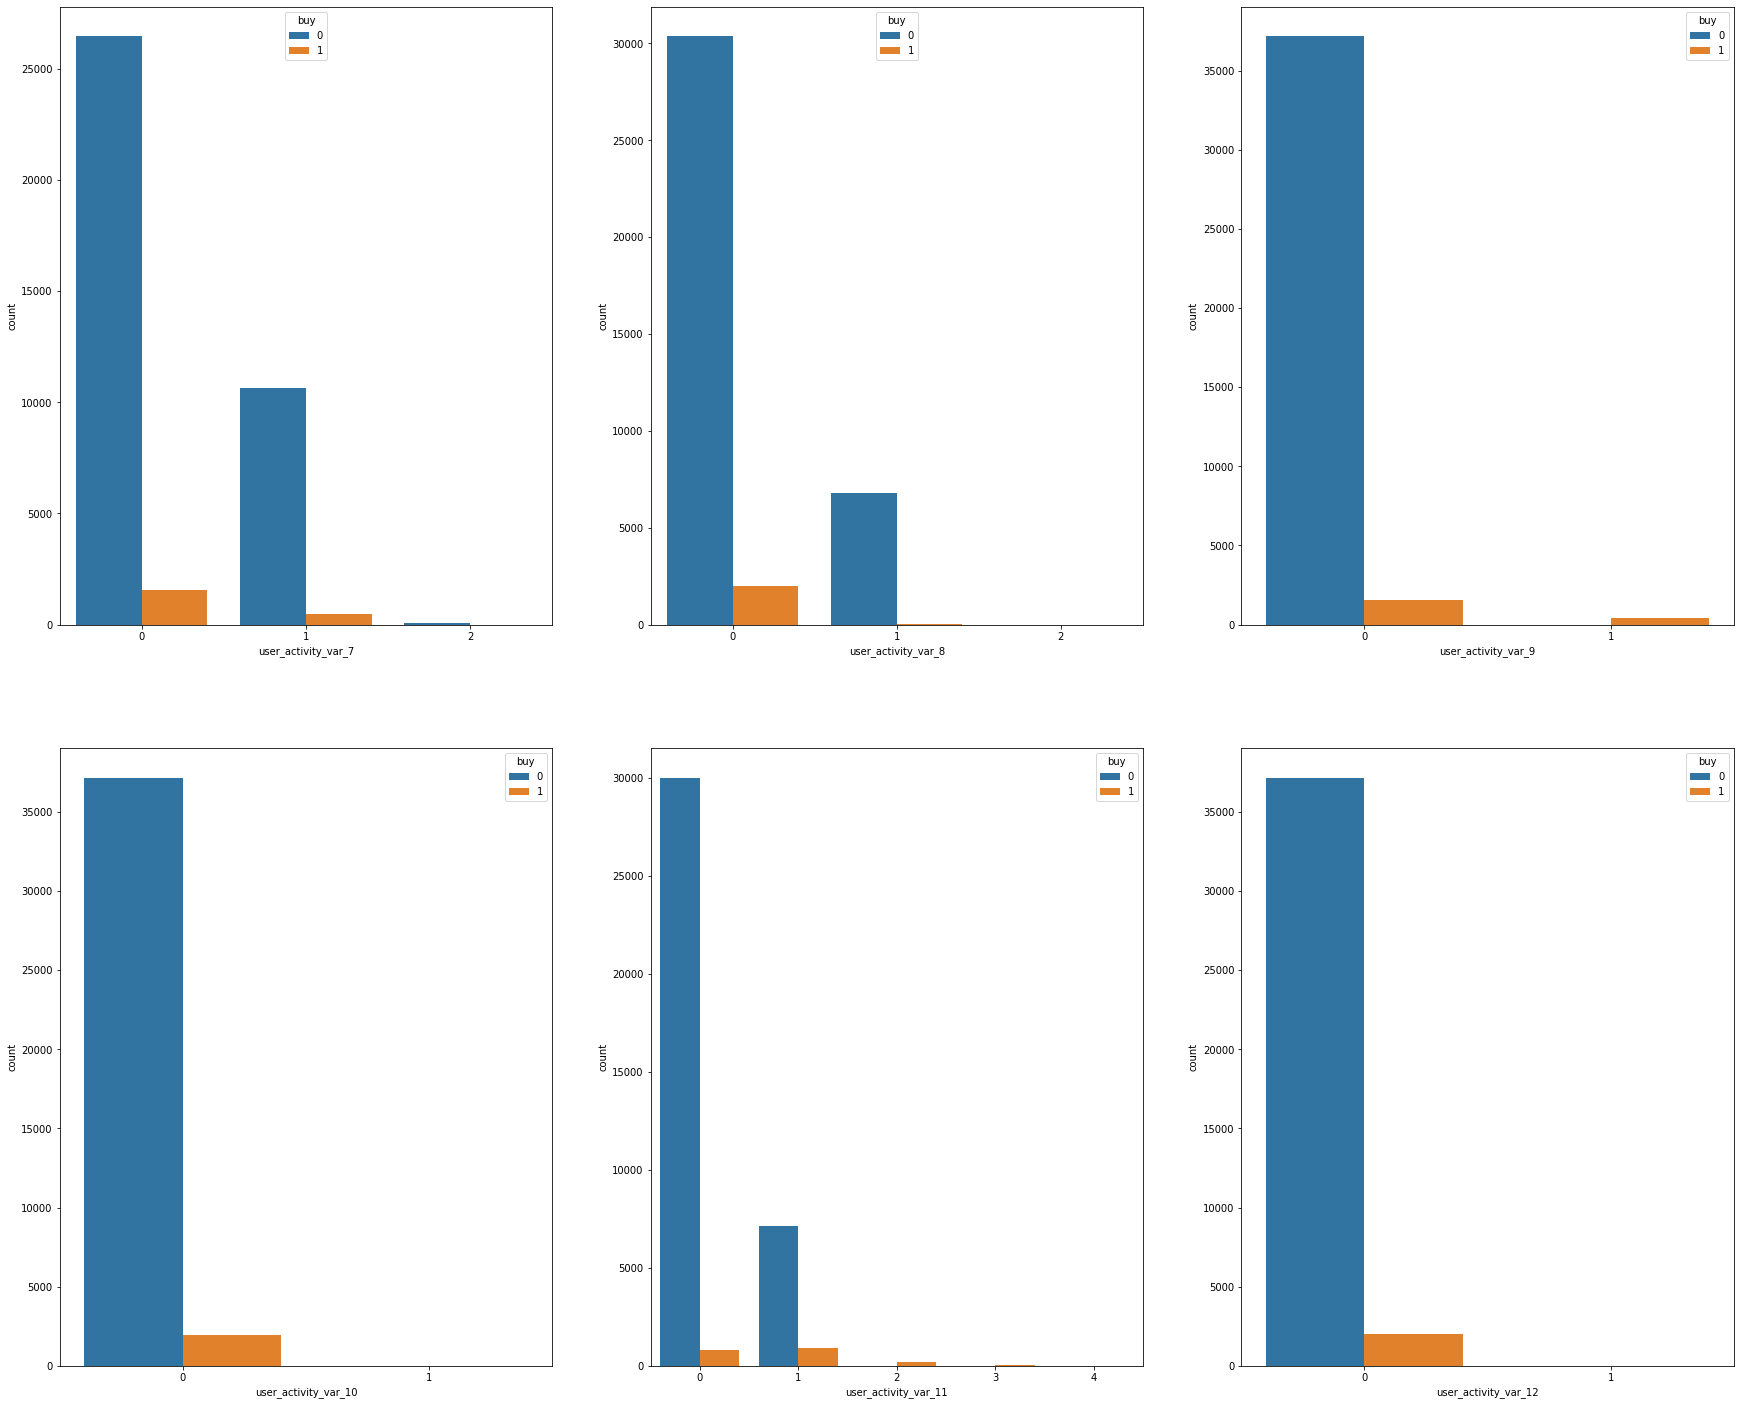

In [445]:
plt.figure(figsize=(30,25))
plt.subplot(2,3,1)
sns.countplot(data=df,x='user_activity_var_7',hue='buy')
plt.subplot(2,3,2)
sns.countplot(data=df,x='user_activity_var_8',hue='buy')
plt.subplot(2,3,3)
sns.countplot(data=df,x='user_activity_var_9',hue='buy')
plt.subplot(2,3,4)
sns.countplot(data=df,x='user_activity_var_10',hue='buy')
plt.subplot(2,3,5)
sns.countplot(data=df,x='user_activity_var_11',hue='buy')
plt.subplot(2,3,6)
sns.countplot(data=df,x='user_activity_var_12',hue='buy')

In [446]:
# checking the distribution of y(depedent_variable) for 'user_activity_var_11' in (2,3,4)
print(df[df['user_activity_var_11']==2]['buy'].value_counts())

print(df[df['user_activity_var_11']==3]['buy'].value_counts())

print(df[df['user_activity_var_11']==4]['buy'].value_counts())

1    220
0      3
Name: buy, dtype: int64
1    23
Name: buy, dtype: int64
1    1
Name: buy, dtype: int64


In [447]:
# clubbing these 3 categories as they have the same distribution w.r.t dependent variable
df['user_activity_var_11']=df['user_activity_var_11'].apply(lambda x : 2 if x in [2,3,4] else x)

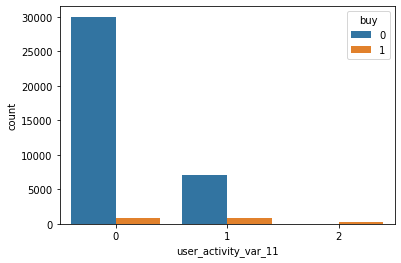

In [448]:
sns.countplot(data=df,x='user_activity_var_11',hue='buy')

### EDA and feature engineering is complete........

# Preparing the data for model run

In [449]:
df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'has_signup',
       'date_diff'],
      dtype='object')

In [450]:
#datatype change for the given columns
cols=['campaign_var_1', 'campaign_var_2',
       'products_purchased', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12']


for i in cols:
    df[i]=df[i].astype(str)

In [451]:
df.dtypes

id                               int64
created_at              datetime64[ns]
campaign_var_1                  object
campaign_var_2                  object
products_purchased              object
signup_date             datetime64[ns]
user_activity_var_1             object
user_activity_var_2             object
user_activity_var_3             object
user_activity_var_4             object
user_activity_var_5             object
user_activity_var_6             object
user_activity_var_7             object
user_activity_var_8             object
user_activity_var_9             object
user_activity_var_10            object
user_activity_var_11            object
user_activity_var_12            object
buy                              int64
has_signup                       int64
date_diff                        int64
dtype: object

In [452]:
# encoding the categorical variable
df_1 = pd.get_dummies(df,columns=cols,drop_first=True)

In [453]:
df_1.columns

Index(['id', 'created_at', 'signup_date', 'buy', 'has_signup', 'date_diff',
       'campaign_var_1_10', 'campaign_var_1_2', 'campaign_var_1_3',
       'campaign_var_1_4', 'campaign_var_1_5', 'campaign_var_1_6',
       'campaign_var_1_7', 'campaign_var_1_8', 'campaign_var_1_9',
       'campaign_var_2_10', 'campaign_var_2_2', 'campaign_var_2_3',
       'campaign_var_2_4', 'campaign_var_2_5', 'campaign_var_2_6',
       'campaign_var_2_7', 'campaign_var_2_8', 'campaign_var_2_9',
       'products_purchased_1.0', 'products_purchased_2.0',
       'products_purchased_3.0', 'products_purchased_4.0',
       'user_activity_var_1_1', 'user_activity_var_1_2',
       'user_activity_var_1_3', 'user_activity_var_2_1',
       'user_activity_var_3_1', 'user_activity_var_4_1',
       'user_activity_var_5_1', 'user_activity_var_5_2',
       'user_activity_var_6_1', 'user_activity_var_6_2',
       'user_activity_var_6_3', 'user_activity_var_7_1',
       'user_activity_var_7_2', 'user_activity_var_8_1',
   

In [454]:
# dropping the id and dates columns
df_1.drop(columns=['id','created_at','signup_date'],axis=1,inplace=True)

In [455]:
df_1.columns

Index(['buy', 'has_signup', 'date_diff', 'campaign_var_1_10',
       'campaign_var_1_2', 'campaign_var_1_3', 'campaign_var_1_4',
       'campaign_var_1_5', 'campaign_var_1_6', 'campaign_var_1_7',
       'campaign_var_1_8', 'campaign_var_1_9', 'campaign_var_2_10',
       'campaign_var_2_2', 'campaign_var_2_3', 'campaign_var_2_4',
       'campaign_var_2_5', 'campaign_var_2_6', 'campaign_var_2_7',
       'campaign_var_2_8', 'campaign_var_2_9', 'products_purchased_1.0',
       'products_purchased_2.0', 'products_purchased_3.0',
       'products_purchased_4.0', 'user_activity_var_1_1',
       'user_activity_var_1_2', 'user_activity_var_1_3',
       'user_activity_var_2_1', 'user_activity_var_3_1',
       'user_activity_var_4_1', 'user_activity_var_5_1',
       'user_activity_var_5_2', 'user_activity_var_6_1',
       'user_activity_var_6_2', 'user_activity_var_6_3',
       'user_activity_var_7_1', 'user_activity_var_7_2',
       'user_activity_var_8_1', 'user_activity_var_8_2',
       'user_

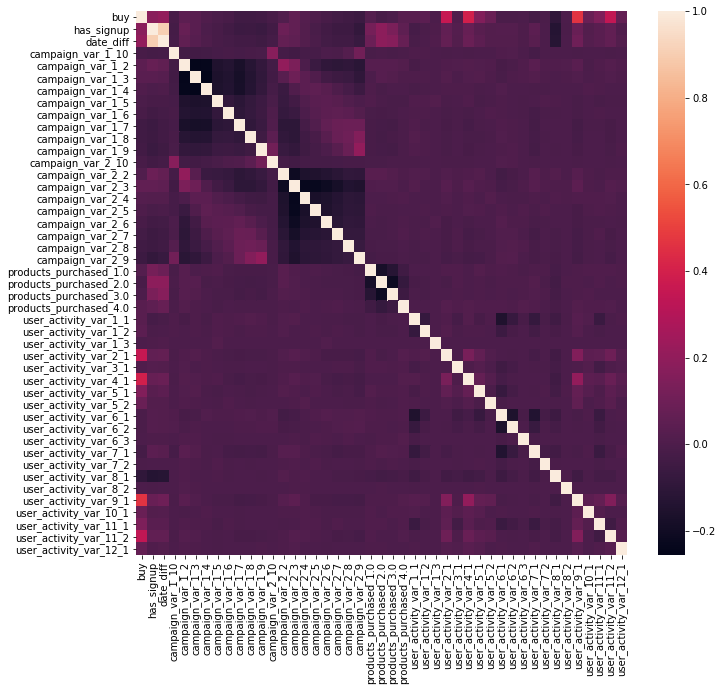

In [456]:
# finding the corelation between the features
plt.figure(figsize=(11,10))
sns.heatmap(df_1.corr())

In [457]:
X=df_1[[a for a in df_1.columns if a not in ['buy','date_diff']]]
y=df_1['buy']

In [458]:
def Counter(y):
    print(y.value_counts())

In [459]:
Counter(y)

0    37163
1     1998
Name: buy, dtype: int64


In [460]:
! pip install imbalanced-learn==0.6.0

In [461]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [530]:
# random undersampling 
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.2,random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

0    37163
1     1998
Name: buy, dtype: int64
original dataset shape: None
0    9990
1    1998
Name: buy, dtype: int64
Resample dataset shape None


In [482]:
# X=df[[a for a in df.columns if a not in ['buy','date_diff','id','id','created_at','signup_date']]]
# y=df['buy']

# Implemented Catboost but didnt work

In [162]:
# cat_features = list(range(0, X.shape[1]))
# print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [509]:
# x_rus.drop(columns=['campaign_var_2_10','campaign_var_1_10','user_activity_var_7_2','user_activity_var_6_3','user_activity_var_1_3','user_activity_var_8_2'],axis=1,inplace=True)

In [531]:
X_train, X_test, y_train, y_test = train_test_split(x_rus,y_rus,test_size=0.2, stratify = y_rus)

In [241]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y)

In [242]:
X_train

,has_signup,campaign_var_1_10,campaign_var_1_2,campaign_var_1_3,campaign_var_1_4,campaign_var_1_5,campaign_var_1_6,campaign_var_1_7,campaign_var_1_8,campaign_var_1_9,...,user_activity_var_6_3,user_activity_var_7_1,user_activity_var_7_2,user_activity_var_8_1,user_activity_var_8_2,user_activity_var_9_1,user_activity_var_10_1,user_activity_var_11_1,user_activity_var_11_2,user_activity_var_12_1
15516,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15379,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17107,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32546,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13649,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35327,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35927,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
26299,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6388,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# from catboost import CatBoostClassifier

In [166]:

# clf = CatBoostClassifier(
#     iterations=150, 
#     depth = 10,
#     learning_rate=0.1, 
#     #loss_function='CrossEntropy'
# )


# clf.fit(X_train, y_train, 
#         cat_features=cat_features, 
#         eval_set=(X_test, y_test), 
#         verbose=False
# )

In [167]:
# # making prediction on the test dataset
# y_pred=clf.predict(X_train)

# # checking the metric scores
# print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred)}")
# print(f"f1_score: {f1_score(y_train,y_pred)}")
# print(f"Accuracy: {accuracy_score(y_train,y_pred)}")
# print(f"roc_auc_score: {roc_auc_score(y_train,y_pred)}")

Confusion_matrix: [[29694    36]
 [  699   899]]
f1_score: 0.7098302408211608
Accuracy: 0.9765385597548519
roc_auc_score: 0.7806836623478643


In [168]:
# # making prediction on the test dataset
# y_pred_2=clf.predict(X_test)

# # checking the metric scores
# print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
# print(f"f1_score: {f1_score(y_test,y_pred_2)}")
# print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
# print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[7416   17]
 [ 183  217]]
f1_score: 0.6845425867507887
Accuracy: 0.974466998595685
roc_auc_score: 0.7701064509619265


In [532]:
sum(y_train)/len(y_train)

0.16663190823774765

In [533]:
sum(y_test)/len(y_test)

0.16680567139282734

In [171]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [185]:
params = {'n_estimators':[10,15,20,25,50,75,100,125,150],
         'max_depth':[5,8,10,12,15],
         'max_features':['auto','log2'],
         'class_weight':['balanced']}

grid_cv = GridSearchCV(classifier,param_grid=params,cv=5,return_train_score=True,scoring='f1')

grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [186]:
grid_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 150}

In [537]:
classifier = RandomForestClassifier(max_depth=12, n_estimators= 300,max_features='log2')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [538]:
# making prediction on the test dataset
y_pred=classifier.predict(X_train)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred)}")
print(f"f1_score: {f1_score(y_train,y_pred)}")
print(f"Accuracy: {accuracy_score(y_train,y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_pred)}")

Confusion_matrix: [[7987    5]
 [ 685  913]]
f1_score: 0.7257551669316376
Accuracy: 0.9280500521376434
roc_auc_score: 0.7853567741709169


In [539]:
# making prediction on the test dataset
y_pred_2=classifier.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"f1_score: {f1_score(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[1994    4]
 [ 176  224]]
f1_score: 0.7133757961783439
Accuracy: 0.9249374478732277
roc_auc_score: 0.778998998998999


# implementing lightgbm

In [60]:
import lightgbm as lgb
classifier_2_=lgb.LGBMClassifier()

In [545]:
params = {'n_estimators':[75,100,125,150,175,200,225,250,275,300],
         'max_depth':[12,15,18,20,23,25,27,30],
         'learning_rate' : [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]}

grid_cv_lgb = GridSearchCV(classifier_2_,param_grid=params,cv=5,return_train_score=True,scoring='f1')

grid_cv_lgb.fit(X_train,y_train)

In [ ]:
grid_cv_lgb.best_params_

In [373]:
classifier_2_ = lgb.LGBMClassifier(max_depth=4, n_estimators= 100,learning_rate=0.25)
classifier_2_.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.25, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [375]:
# making prediction on the test dataset
y_pred=classifier_2_.predict(X_train)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred)}")
print(f"f1_score: {f1_score(y_train,y_pred)}")
print(f"precision_score: {f1_score(y_train,y_pred)}")
print(f"recall_score: {f1_score(y_train,y_pred)}")
print(f"Accuracy: {accuracy_score(y_train,y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_pred)}")

Confusion_matrix: [[7926   66]
 [ 551 1047]]
f1_score: 0.7724087052748063
precision_score: 0.7724087052748063
recall_score: 0.7724087052748063
Accuracy: 0.9356621480709072
roc_auc_score: 0.8234678671161776


In [372]:
# making prediction on the test dataset
y_pred_2=classifier_2_.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"f1_score: {f1_score(y_test,y_pred_2)}")
print(f"precision_score: {f1_score(y_test,y_pred_2)}")
print(f"recall_score: {f1_score(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[1964   34]
 [ 137  263]]
f1_score: 0.7546628407460545
precision_score: 0.7546628407460545
recall_score: 0.7546628407460545
Accuracy: 0.9286905754795663
roc_auc_score: 0.8202414914914915


# implementing xgboost

In [98]:
! pip install xgboost

     |████████████████████████████████| 192.9 MB 31 kB/s s eta 0:00:01     |███████████████████████████████ | 186.6 MB 2.2 MB/s eta 0:00:03


In [99]:
import xgboost as xgb

In [105]:
clssifier_3 = xgb.XGBClassifier(objective='binary:logistic')

In [380]:
clssifier_3 = xgb.XGBClassifier(objective='binary:logistic')
clssifier_3.fit(X_train,y_train,
               verbose= True,
               early_stopping_rounds=10,
               eval_metric='logloss',
               eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:0.50317
[1]	validation_0-logloss:0.39992
[2]	validation_0-logloss:0.33596
[3]	validation_0-logloss:0.29413
[4]	validation_0-logloss:0.26537
[5]	validation_0-logloss:0.24561
[6]	validation_0-logloss:0.23236
[7]	validation_0-logloss:0.22309
[8]	validation_0-logloss:0.21525
[9]	validation_0-logloss:0.21063


/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[10]	validation_0-logloss:0.20648
[11]	validation_0-logloss:0.20305
[12]	validation_0-logloss:0.20084
[13]	validation_0-logloss:0.19889
[14]	validation_0-logloss:0.19778
[15]	validation_0-logloss:0.19595
[16]	validation_0-logloss:0.19477
[17]	validation_0-logloss:0.19376
[18]	validation_0-logloss:0.19275
[19]	validation_0-logloss:0.19219
[20]	validation_0-logloss:0.19138
[21]	validation_0-logloss:0.19102
[22]	validation_0-logloss:0.19038
[23]	validation_0-logloss:0.18976
[24]	validation_0-logloss:0.18996
[25]	validation_0-logloss:0.18949
[26]	validation_0-logloss:0.18916
[27]	validation_0-logloss:0.18873
[28]	validation_0-logloss:0.18855
[29]	validation_0-logloss:0.18852
[30]	validation_0-logloss:0.18860
[31]	validation_0-logloss:0.18888
[32]	validation_0-logloss:0.18880
[33]	validation_0-logloss:0.18908
[34]	validation_0-logloss:0.18909
[35]	validation_0-logloss:0.18901
[36]	validation_0-logloss:0.18907
[37]	validation_0-logloss:0.18810
[38]	validation_0-logloss:0.18812
[39]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [381]:
# making prediction on the test dataset
y_pred_2=clssifier_3.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"f1_score: {f1_score(y_test,y_pred_2)}")
print(f"precision_score: {f1_score(y_test,y_pred_2)}")
print(f"recall_score: {f1_score(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[1977   21]
 [ 148  252]]
f1_score: 0.7488855869242198
precision_score: 0.7488855869242198
recall_score: 0.7488855869242198
Accuracy: 0.9295246038365305
roc_auc_score: 0.8097447447447447


In [123]:
params_grid ={
    'max_depth' : [3,5,8,10,12],
    'learning_rate' : [0.05,0.1,0.2,0.5,1],
    'gamma' : [0,0.25,1.0],
    'reg_lambda' : [0,1.0,10,20,50,100],
    'scale_pos_weight' : [1,3,5,10]
    
}

In [124]:
classifier_3_ = xgb.XGBClassifier(objective='binary:logistic',subsample=0.9)

In [544]:
grid_cv_xgb = GridSearchCV(classifier_3_,param_grid=params_grid,cv=3,return_train_score=True,scoring='f1')

grid_cv_xgb.fit(X_train,y_train)

In [ ]:
grid_cv_xgb.best_params_

In [ ]:
print(1)

In [386]:
clssifier_3 = xgb.XGBClassifier(objective='binary:logistic',
                               n_estimators=100,
                               learning_rate=0.1,
                               max_depth=5,
                               scale_pos_weight=4,
                               )
clssifier_3.fit(X_train,y_train,
               verbose= True,
               early_stopping_rounds=50,
               eval_metric='aucpr',
               eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.72074
[1]	validation_0-aucpr:0.80027
[2]	validation_0-aucpr:0.80449
[3]	validation_0-aucpr:0.81181
[4]	validation_0-aucpr:0.82308
[5]	validation_0-aucpr:0.81256
[6]	validation_0-aucpr:0.82913
[7]	validation_0-aucpr:0.82937
[8]	validation_0-aucpr:0.81671
[9]	validation_0-aucpr:0.83253
[10]	validation_0-aucpr:0.83310
[11]	validation_0-aucpr:0.83489


/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[12]	validation_0-aucpr:0.83269
[13]	validation_0-aucpr:0.83632
[14]	validation_0-aucpr:0.83891
[15]	validation_0-aucpr:0.83660
[16]	validation_0-aucpr:0.83831
[17]	validation_0-aucpr:0.83812
[18]	validation_0-aucpr:0.83850
[19]	validation_0-aucpr:0.83829
[20]	validation_0-aucpr:0.83976
[21]	validation_0-aucpr:0.83962
[22]	validation_0-aucpr:0.83963
[23]	validation_0-aucpr:0.84493
[24]	validation_0-aucpr:0.84494
[25]	validation_0-aucpr:0.84724
[26]	validation_0-aucpr:0.84696
[27]	validation_0-aucpr:0.84685
[28]	validation_0-aucpr:0.84863
[29]	validation_0-aucpr:0.85044
[30]	validation_0-aucpr:0.85056
[31]	validation_0-aucpr:0.85040
[32]	validation_0-aucpr:0.85119
[33]	validation_0-aucpr:0.85069
[34]	validation_0-aucpr:0.85089
[35]	validation_0-aucpr:0.85152
[36]	validation_0-aucpr:0.85142
[37]	validation_0-aucpr:0.85192
[38]	validation_0-aucpr:0.85245
[39]	validation_0-aucpr:0.85518
[40]	validation_0-aucpr:0.85512
[41]	validation_0-aucpr:0.85528
[42]	validation_0-aucpr:0.85525
[43]	val

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [387]:
# making prediction on the test dataset
y_pred_2=clssifier_3.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"f1_score: {f1_score(y_test,y_pred_2)}")
print(f"precision_score: {f1_score(y_test,y_pred_2)}")
print(f"recall_score: {f1_score(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[1818  180]
 [  72  328]]
f1_score: 0.7224669603524229
precision_score: 0.7224669603524229
recall_score: 0.7224669603524229
Accuracy: 0.8949124270225187
roc_auc_score: 0.8649549549549549


In [388]:
# making prediction on the test dataset
y_pred_2=clssifier_3.predict(X_train)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred_2)}")
print(f"f1_score: {f1_score(y_train,y_pred_2)}")
print(f"precision_score: {f1_score(y_train,y_pred_2)}")
print(f"recall_score: {f1_score(y_train,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_train,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_pred_2)}")

Confusion_matrix: [[7339  653]
 [ 285 1313]]
f1_score: 0.7368125701459035
precision_score: 0.7368125701459035
recall_score: 0.7368125701459035
Accuracy: 0.9021897810218978
roc_auc_score: 0.8699726791873225


In [507]:
importances = classifier.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

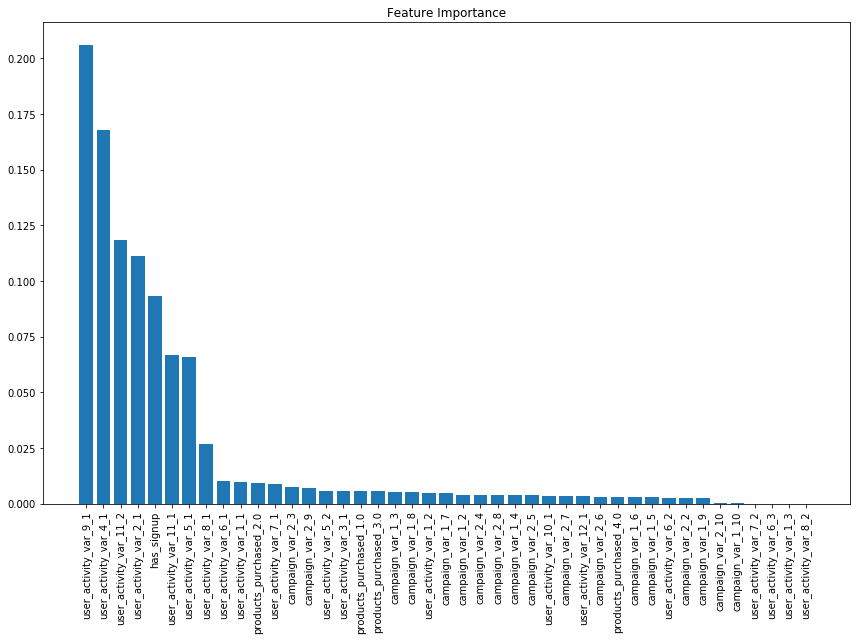

In [508]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
['campaign_var_2_10','campaign_var_1_10','user_activity_var_7_2','user_activity_var_6_3','user_activity_var_1_3','user_activity_var_8_2']

# Preparing the test dataset

In [171]:
# reading the test_dataset

In [75]:
df_test = pd.read_csv('test_Wf7sxXF.csv')

In [76]:
df_test.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [77]:
df_test['products_purchased']=df_test.products_purchased.fillna(0.0)

In [78]:
#creating a new column 'has_signup' which is 1 if signup_date is not null and 0 if signup date is null
df_test['has_signup']=1
df_test.loc[df['signup_date'].isnull(),'has_signup']=0

In [79]:
# converting date columns into datetime
df_test['created_at']=pd.to_datetime(df_test['created_at'])

df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])

In [80]:
# based on the above percentage(of y=1 in each ccategory of campaign_var_1) we can club some of the categories as the distribution of these categries is quite similar

# clubing category 2&3
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 2 if (x==2) | (x==3) else x)

#clubing category 4 & 5
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 3 if (x==4) | (x==5) else x)

#clubing category 6& 7
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 4 if (x==6) | (x==7) else x)

#renaming category 8
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 5 if (x==8) else x)

#renaming category 9
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 6 if (x==9) else x)

#clubing category 10 & 11
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 7 if (x==10) | (x==11) else x)

#clubing category 12 & 13
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 8 if (x==12) | (x==13) else x)

#clubing category 14 & 15
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 9 if (x==14) | (x==15) else x)

#renaming category 16
df_test['campaign_var_1']= df_test['campaign_var_1'].apply(lambda x : 10 if (x==16) else x)


In [81]:
# based on the above percentage(of y=1 in each ccategory of campaign_var_2) we can club some of the categories as the distribution of these categries is quite similar

# clubing category 2&3
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 2 if (x==2) | (x==3) else x)

#clubing category 4 & 5
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 3 if (x==4) | (x==5) else x)

#renaming category 6
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 4 if (x==6) else x)

#renaming category 7
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 5 if (x==7) else x)

#renaming category 8
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 6 if (x==8) else x)

#renaming category 9
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 7 if (x==9) else x)

#renaming category 10
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 8 if (x==10) else x)

#clubing category 11 & 12 & 13
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 9 if (x==11) | (x==12) | (x==13) else x)

#clubing category 14 & 15
df_test['campaign_var_2']= df_test['campaign_var_2'].apply(lambda x : 10 if (x==14) | (x==15) else x)


In [82]:
# creating a date_diff column which indicates the time period between sign up and the lead drop
df_test['date_diff']=df_test['created_at']-df_test['signup_date']

In [83]:
df_test['date_diff']=df_test['date_diff'].astype(str)
df_test['date_diff']=df_test['date_diff'].apply(lambda x: x.split(" ")[0])

In [84]:
df_test['date_diff'].replace({'NaT': '-1000'},inplace=True)
df_test['date_diff']=df_test['date_diff'].astype(int)

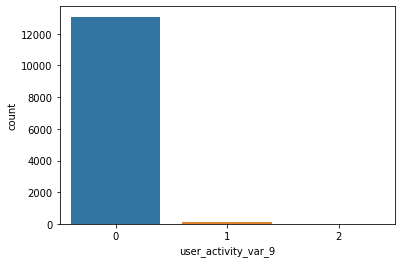

In [85]:
sns.countplot(data=df_test,x='user_activity_var_9')

In [86]:
df_test['user_activity_var_9'].value_counts()

0    13074
1      109
2        1
Name: user_activity_var_9, dtype: int64

In [87]:
df_test['user_activity_var_9']=df_test['user_activity_var_9'].apply(lambda x : 1 if x in [1,2] else x)

In [88]:
# clubbing these 3 categories as they have the same distribution w.r.t dependent variable
df_test['user_activity_var_11']=df_test['user_activity_var_11'].apply(lambda x : 2 if x in [2,3,4] else x)

In [89]:
#datatype change for the given columns
cols=['campaign_var_1', 'campaign_var_2',
       'products_purchased', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12']


for i in cols:
    df_test[i]=df_test[i].astype(str)

In [529]:
# df_test_2 = df_test.drop(columns=['campaign_var_2_10','campaign_var_1_10','user_activity_var_7_2','user_activity_var_6_3','user_activity_var_1_3','user_activity_var_8_2'],axis=1)

In [90]:
# encoding the categorical variable
df_test_1 = pd.get_dummies(df_test,columns=cols,drop_first=True)

In [91]:
user_id=df_test_1['id'].values

In [92]:
# dropping the id and dates columns
df_test_1.drop(columns=['id','created_at','signup_date'],axis=1,inplace=True)

In [93]:
df_test_1.drop(columns=['date_diff'],axis=1,inplace=True)

In [221]:
set(df_test_1.columns)-set(X.columns)

{'date_diff', 'user_activity_var_9_2'}

In [244]:
df_test_1.shape

(13184, 43)

In [245]:
len(y_test_pred)

13184

In [540]:
# making prediction on the test dataset
y_test_pred=classifier.predict(df_test_1)

# # checking the metric scores
# print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
# print(f"f1_score: {f1_score(y_test,y_pred_2)}")
# print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
# print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

In [541]:
final_output = pd.DataFrame({'id':user_id,'buy':y_test_pred})

In [542]:
final_output['buy'].value_counts()

0    12863
1      321
Name: buy, dtype: int64

In [543]:
final_output.to_csv('results.csv',index=False)